In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
1554
709
415
464
1231
477
415
1031
711
147
365
135
337
63
223
233
57
67
71
379
61
103
57
65
61
33
59
35
25
31
35
25
21
25
27
27
25
27
25
21
27
21
27
21
23
21
23
21
23
29
23
21
21
27
23
23
25
23
21
21
25
21
29
21
21
25
27
21
21
21
23
21
29
25
23
25
23
27
23
23
25
21
23
23
21
21
21
23
25
23
25
21
25
21
21
21
21
21
21
25
27
21
23
23
23
23
23
21
21
21
21
23
23
23
25
21
23
23
21
25
21
23
21
21
21
21
25
21
21
23
21
23
23
21
21
23
23
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
23
25
21
21
21
21
21
21
21
21
23
21
23
23
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
23
21
21
21
21
21
23
[1554, 709, 415, 464, 1231, 477, 415, 1031, 711, 147, 365, 135, 337, 63, 223, 233, 57, 67, 71, 379, 61, 103, 57, 65, 61, 33, 59, 35, 25, 31, 35, 25, 21, 25, 27, 27, 25, 27, 25, 21, 27, 21, 27, 21, 23, 21, 23, 21, 23, 29, 23, 21, 21, 27, 23, 23, 25, 23, 21, 21, 25, 21, 29, 21, 21, 25, 27, 21, 21, 21, 23, 21, 29, 25, 23, 2

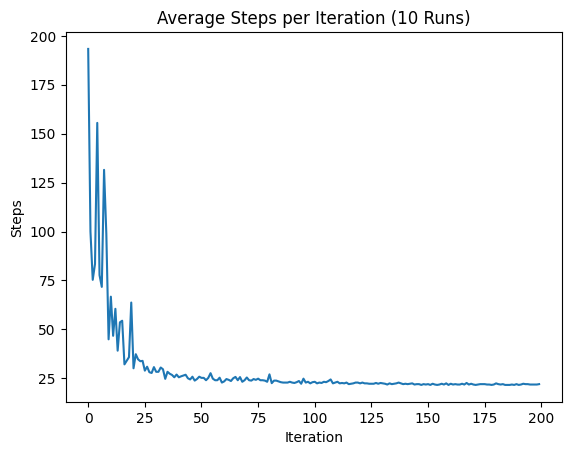

In [78]:
from matplotlib import pyplot as plt
import numpy as np

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

endpoint = maze.get_final_state()
# Set the reward at the bottom right to 10
maze.set_reward(endpoint, 10)
maze.set_reward(maze.get_state(9, 0), 5)

# Create a robot at starting and reset location (0,0) (top left)
robot = Agent(0, 0)

# Make a selection object (you need to implement the methods in this class)
selection = MyEGreedy()

# Make a Qlearning object (you need to implement the methods in this class)
learn = MyQLearning()

epsilon = 0.4
max_iterations = 200
decay_rate = 0.98

alpha = 0.7
gamma = 0.9

steps_per_iteration = []
iterations2 = []
number_of_runs = 10



# keep learning until you decide to stop
for run in range(number_of_runs):
    steps = 0
    stop = False
    iterations = 0

    while not stop and iterations < max_iterations:
        #get valid actions and robot location
        cur_state = robot.get_state(maze)
        cur_epsilon = epsilon * (decay_rate ** iterations)
        action = selection.get_egreedy_action(robot, maze, learn, cur_epsilon)

        #move the robot
        new_state = robot.do_action(action, maze)
        new_reward = maze.get_reward(new_state)
        valid_actions = maze.get_valid_actions(robot)


        #update q_learning
        learn.update_q(cur_state, action, new_reward, new_state, valid_actions, alpha, gamma)
        steps += 1
        if new_state == endpoint or new_state == maze.get_state(9, 0):
            robot.reset()
            steps_per_iteration.append(steps)
            iterations2.append(iterations)
            steps = 0
            iterations += 1

    print(steps_per_iteration)

avg_steps_per_iteration = np.mean(np.array(steps_per_iteration).reshape(number_of_runs, -1), axis=0)
plt.plot(range(len(avg_steps_per_iteration)), avg_steps_per_iteration)
plt.title(f"Average Steps per Iteration ({number_of_runs} Runs)")
plt.xlabel("Iteration")
plt.ylabel("Steps")
plt.show()
